<div class="alert alert-block alert-info"> <br>

#  <center> <b> Data Mining Project- ABCDEats Inc. </center> <br>
## <center> Clustering Models </center> <br>
### <center> Group 38 <center>

  <div>

### Group Members
| Name              | Email                        | Student ID |
|-------------------|------------------------------|------------|
| Inês Araújo       | 20240532@novaims.unl.pt      | 20240532   |
| Leonor Mira       | 20240658@novaims.unl.pt      | 20240658   |
| Rafael Silva      | 20240511@novaims.unl.pt      | 20240511   |
| Rita Serra        | 20240515@novaims.unl.pt      | 20240515   |

---

### **2. Clustering Techniques Notebook**
**Description:**
In this notebook, we will experiment with and evaluate various clustering techniques to uncover patterns and groupings within the data. The focus will be on the following methods:

- **Hierarchical Clustering:** Organizes the data into a hierarchy of clusters, providing insights into relationships at multiple levels of granularity.
- **K-Means Clustering:** Partitions the data into a predefined number of clusters (`k`), optimizing similarity within each group.
- **Self-Organizing Maps (SOMs):** Uses neural network-based methods to project high-dimensional data into a lower-dimensional map, revealing complex clustering patterns.

Key steps include:
- Loading the **dataset** for clustering analysis.
- Applying **preprocessing and normalization** to prepare the data for clustering.
- **Implementing clustering algorithms**: Experimenting with the three techniques mentioned above.
- **Visualization and evaluation:** Visualizing cluster formations and analyzing their quality using metrics such as Silhouette Score.
- **Comparison:** Comparing the strengths and limitations of each method.

This notebook serves as a foundational exploration of clustering methods, providing insights into how different techniques handle the same dataset.

---

## **Table of Contents** <br>

---

<div class="alert alert-block alert-success">
<a class="anchor" id="importlibraries">

# 1. Import Libraries
    
</a>
<div>

In [1]:
import pandas as pd  # Imports the pandas library, used for handling and analyzing structured data in tables (DataFrames).
import numpy as np  # Imports numpy, which is helpful for working with numerical data, especially for mathematical functions and arrays.
import matplotlib.pyplot as plt  # Imports matplotlib's pyplot module to create plots and charts for visualizing data.
import seaborn as sns  # Imports seaborn, a library built on matplotlib, for creating more advanced and visually appealing statistical graphics.
from math import ceil  # Imports the ceil function from the math library, which rounds numbers up to the nearest whole number.
from scipy.stats import f_oneway # Import the f_oneway function from SciPy for performing a one-way ANOVA test

# --
from os.path import join
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram

sns.set()

<div class="alert alert-block alert-success">
<a class="anchor" id="importdataset">
    
# 2. Import dataset
    
</a>
<div>

In [16]:
df = pd.read_csv('Preprocessed_Data.csv', index_col='customer_id')

In [3]:
df.columns

Index(['customer_age', 'vendor_count', 'product_count', 'first_order',
       'last_order', 'CUI_American', 'CUI_Asian', 'CUI_Beverages', 'CUI_Cafe',
       'CUI_Chicken Dishes',
       ...
       'is_chain_6', 'is_chain_7', 'is_chain_8', 'is_chain_9',
       'is_chain_Other Chains', 'last_promo_DISCOUNT', 'last_promo_FREEBIE',
       'last_promo_NOPROMO', 'payment_method_CASH', 'payment_method_DIGI'],
      dtype='object', length=109)

In [4]:
df_clusters = df.copy()

In [5]:
cuisine_cols= df_clusters.columns[df_clusters.columns.str.contains('CUI_')].tolist()
# Create a list with variables referring to the hours of the day
hr_cols = df_clusters.columns[df_clusters.columns.str.contains('HR')].tolist()
# Create a list with variables referring to the days of the week
dow_cols = df_clusters.columns[df_clusters.columns.str.contains('DOW')].tolist()

In [6]:
df_clusters.drop(columns = hr_cols, inplace = True)
df_clusters.drop(columns = cuisine_cols, inplace = True)
df_clusters.drop(columns = dow_cols, inplace = True)

In [7]:
df_clusters.columns

Index(['customer_age', 'vendor_count', 'product_count', 'first_order',
       'last_order', 'dif_order', 'tot_CUI', 'tot_work_days',
       'tot_leisure_days', 'total_products_by_week', 'total_products_by_day',
       'tot_early_morning', 'tot_breakfast', 'tot_lunch', 'tot_afternoon',
       'tot_dinner', 'tot_late_night', 'tot_western_cuisines',
       'tot_oriental_cuisines', 'tot_other_cuisines', 'purchased_cuisines',
       'customer_region_2440', 'customer_region_2490', 'customer_region_4140',
       'customer_region_4660', 'customer_region_8370', 'customer_region_8550',
       'customer_region_8670', 'is_chain_1', 'is_chain_10', 'is_chain_11',
       'is_chain_12', 'is_chain_13', 'is_chain_14', 'is_chain_15',
       'is_chain_16', 'is_chain_17', 'is_chain_18', 'is_chain_19',
       'is_chain_2', 'is_chain_20', 'is_chain_21', 'is_chain_22',
       'is_chain_23', 'is_chain_24', 'is_chain_25', 'is_chain_26',
       'is_chain_27', 'is_chain_28', 'is_chain_29', 'is_chain_3', 'is_chain

Before beginning the clustering process, we can reduce the dimensionality of the features by categorizing them into four main groups, each representing different aspects of customer information and behavior:

1. **Customer Profile (`Customer_perfil`)**  
   Describes the basic details and temporal purchase activity of the customer:  
   - `customer_age`: The age of the customer.  
   - `first_order`: The date of the customer's first order.  
   - `last_order`: The date of the customer's most recent order.  
   - `dif_order`: The time difference between the first and last order, indicating customer activity over time.

2. **Purchasing Patterns (`Purchasing_patterns`)**  
   Highlights the customer's ordering behavior on specific days:  
   - `tot_work_days`: Total number of orders placed on working days.  
   - `tot_leisure_days`: Total number of orders placed on leisure or non-working days.

3. **Customer Behavior (`Customer_behavior`)**  
   Analyzes the customer's activity based on time-of-day preferences:  
   - `tot_early_morning`: Orders placed in the early morning.  
   - `tot_breakfast`: Orders placed during breakfast hours.  
   - `tot_lunch`: Orders placed during lunch hours.  
   - `tot_afternoon`: Orders placed in the afternoon.  
   - `tot_dinner`: Orders placed during dinner hours.  
   - `tot_late_night`: Orders placed late at night.

4. **Culinary Preferences (`Culinary_preferences`)**  
   Focuses on the customer's choice of cuisines and overall culinary habits:  
   - `tot_western_cuisines`: Total orders of Western-style cuisines.  
   - `tot_oriental_cuisines`: Total orders of Oriental-style cuisines.  
   - `tot_other_cuisines`: Total orders of other styles of cuisines.  
   - `purchased_cuisines`: The specific cuisines purchased by the customer.  
   - `tot_CUI`: Total number of unique cuisines ordered by the customer.  


In [8]:
Customer_perfil = ['customer_age', 'first_order', 'last_order', 'dif_order']
Purchasing_patterns = ['tot_work_days', 'tot_leisure_days']
Customer_behavior = ['tot_early_morning', 'tot_breakfast','tot_lunch', 'tot_afternoon', 'tot_dinner', 'tot_late_night']
Culinary_preferences = ['tot_western_cuisines', 'tot_oriental_cuisines', 'tot_other_cuisines', 'purchased_cuisines', 'tot_CUI']

In [9]:
# Dicionário de categorias e suas respectivas features
categories = {
    'Customer_profile': ['customer_age', 'first_order', 'last_order', 'dif_order'],
    'Purchasing_patterns': ['tot_work_days', 'tot_leisure_days'],
    'Customer_behavior': ['tot_early_morning', 'tot_breakfast', 'tot_lunch', 'tot_afternoon', 'tot_dinner', 'tot_late_night'],
    'Culinary_preferences': ['tot_western_cuisines', 'tot_oriental_cuisines', 'tot_other_cuisines', 'purchased_cuisines', 'tot_CUI']
}

In [10]:
# Criar subsets para cada categoria
df_selected_1 = df[Customer_perfil]
df_selected_2 = df[Purchasing_patterns]
df_selected_3 = df[Customer_behavior]
df_selected_4 = df[Culinary_preferences]

<div class="alert alert-block alert-success">
<a class="anchor" id="section_3">
    
# 3. Hierarchical Clustering
    
</a>
<div>

## Defining the linkage method to choose:

### $SS_{t},  SS_{w}, SS_{b}$

In [ ]:
# Criar subsets para cada categoria
df_selected_1 = df[Customer_perfil]
df_selected_2 = df[Purchasing_patterns]
df_selected_3 = df[Customer_behavior]
df_selected_4 = df[Culinary_preferences]

# Inicializar o modelo de clustering
hclust = AgglomerativeClustering(linkage='ward', metric='euclidean', n_clusters=5)

# Aplicar o clustering a cada categoria separadamente
hc_labels_customer_perfil = hclust.fit_predict(df_selected_1)
hc_labels_purchasing_patterns = hclust.fit_predict(df_selected_2)
hc_labels_customer_behavior = hclust.fit_predict(df_selected_3)
hc_labels_culinary_preferences = hclust.fit_predict(df_selected_4)

# Exibir os resultados
print("Labels para Customer_perfil:", hc_labels_customer_perfil)
print("Labels para Purchasing_patterns:", hc_labels_purchasing_patterns)
print("Labels para Customer_behavior:", hc_labels_customer_behavior)
print("Labels para Culinary_preferences:", hc_labels_culinary_preferences)

In [ ]:
# Adicionar os labels de cada categoria ao DataFrame original
df_concat = pd.concat([
    df,
    pd.Series(hc_labels_customer_perfil, name='labels_customer_perfil', index=df.index),
    pd.Series(hc_labels_purchasing_patterns, name='labels_purchasing_patterns', index=df.index),
    pd.Series(hc_labels_customer_behavior, name='labels_customer_behavior', index=df.index),
    pd.Series(hc_labels_culinary_preferences, name='labels_culinary_preferences', index=df.index)
], axis=1)

# Caracterizar os clusters para cada categoria separadamente
cluster_summary_customer_perfil = df_concat.groupby('labels_customer_perfil')[Customer_perfil].mean()
cluster_summary_purchasing_patterns = df_concat.groupby('labels_purchasing_patterns')[Purchasing_patterns].mean()
cluster_summary_customer_behavior = df_concat.groupby('labels_customer_behavior')[Customer_behavior].mean()
cluster_summary_culinary_preferences = df_concat.groupby('labels_culinary_preferences')[Culinary_preferences].mean()

In [12]:
def get_sst(df_clusters, feats):
    """
    Calculate the sum of squares (SST) for the given DataFrame.

    The sum of squares is computed as the sum of the variances of each column
    multiplied by the number of non-NA/null observations minus one.

    Parameters:
    df_clusters (pandas.DataFrame): The input DataFrame for which the sum of squares is to be calculated.
    feats (list of str): A list of feature column names to be used in the calculation.

    Returns:
    float: The sum of squares of the DataFrame.
    """
    df_clusters_ = df_clusters[feats]
    sst = np.sum(df_clusters_.var() * (df_clusters_.count() - 1))
    
    return sst 




def get_ssb(df_clusters, feats, label_col):
    """
    Calculate the between-group sum of squares (SSB) for the given DataFrame.
    The between-group sum of squares is computed as the sum of the squared differences
    between the mean of each group and the overall mean, weighted by the number of observations
    in each group.

    Parameters:
    df_clusters (pandas.DataFrame): The input DataFrame containing the data.
    feats (list of str): A list of feature column names to be used in the calculation.
    label_col (str): The name of the column in the DataFrame that contains the group labels.
    
    Returns
    float: The between-group sum of squares of the DataFrame.
    """
    
    ssb_i = 0
    for i in np.unique(df_clusters[label_col]):
        df_clusters_ = df_clusters.loc[:, feats]
        X_ = df_clusters_.values
        X_k = df_clusters_.loc[df_clusters[label_col] == i].values
        
        ssb_i += (X_k.shape[0] * (np.square(X_k.mean(axis=0) - X_.mean(axis=0))) )

    ssb = np.sum(ssb_i)
    

    return ssb


def get_ssw(df_clusters, feats, label_col):
    """
    Calculate the sum of squared within-cluster distances (SSW) for a given DataFrame.

    Parameters:
    df_clusters (pandas.DataFrame): The input DataFrame containing the data.
    feats (list of str): A list of feature column names to be used in the calculation.
    label_col (str): The name of the column containing cluster labels.

    Returns:
    float: The sum of squared within-cluster distances (SSW).
    """
    feats_label = feats+[label_col]

    df_clusters_k = df_clusters[feats_label].groupby(by=label_col).apply(lambda col: get_sst(col, feats), 
                                                       include_groups=False)

    return df_clusters_k.sum()
# SSw

ssw_sum = 0

for i in df_clusters_concat['labels'].unique():
    df_clusters_k = df_clusters_concat.loc[df_clusters_concat['labels']==i, metric_features]
    x_k = df_clusters_k.mean()
    ssw_sum += (np.sum(np.square(df_clusters_k - x_k ), axis=0))


ssw_sum = np.sum(ssw_sum, axis=0)

ssw_sum

364677.634449293

In [13]:
df_clusters_sst_ = get_sst(df_clusters_concat, metric_features)
df_clusters_ssb_ = get_ssb(df_clusters_concat, metric_features, 'labels')
df_clusters_ssw_ = get_ssw(df_clusters_concat, metric_features, 'labels')

print("SSb:  ", df_clusters_ssb_)
print("SSw:  ", df_clusters_ssw_)
print("SSt:  ", df_clusters_sst_)
print("SSt == SSb+SSw ? ", (df_clusters_sst_ == df_clusters_ssb_ + df_clusters_ssw_))


SSb:   164243.36555070698
SSw:   364677.6344492954
SSt:   528920.9999999617
SSt == SSb+SSw ?  False


In [14]:
# SSt

x_i = df_clusters_concat[metric_features]
x_mean = df_clusters_concat[metric_features].mean()

sst_sum = np.sum(np.sum(np.square(x_i - x_mean), axis=0), axis=0)
sst_sum


528921.0

In [15]:
# SSb

ssb_sum = 0
x_mean = df_clusters_concat[metric_features].mean()

for i in df_clusters_concat['labels'].unique():
    df_clusters_k = df_clusters_concat.loc[df_clusters_concat['labels']==i, metric_features]
    n_k = df_clusters_k.shape[0]
    x_k = df_clusters_k.mean()
    ssb_sum += (n_k * np.square((x_k - x_mean)))

ssb_sum = ssb_sum.sum()
ssb_sum


164243.36555070698

In [16]:
# SSw

ssw_sum = 0

for i in df_clusters_concat['labels'].unique():
    df_clusters_k = df_clusters_concat.loc[df_clusters_concat['labels']==i, metric_features]
    x_k = df_clusters_k.mean()
    ssw_sum += (np.sum(np.square(df_clusters_k - x_k ), axis=0))


ssw_sum = np.sum(ssw_sum, axis=0)

ssw_sum


364677.634449293

In [17]:
# Verify: 

sst_sum == ssw_sum + ssb_sum

True

### $R^2$

In [18]:

def get_rsq(df_clusters, feats, label_col):
    """
    Calculate the R-squared value for a given DataFrame and features.

    Parameters:
    df_clusters (pd.DataFrame): The input DataFrame containing the data.
    feats (list): A list of feature column names to be used in the calculation.
    label_col (str): The name of the column containing the labels or cluster assignments.

    Returns:
    float: The R-squared value, representing the proportion of variance explained by the clustering.
    """

    df_clusters_sst_ = get_sst(df_clusters, feats)                 # get total sum of squares
    df_clusters_ssw_ = get_ssw(df_clusters, feats, label_col)     # get ss within
    df_clusters_ssb_ = df_clusters_sst_ - df_clusters_ssw_                 # get ss between

    # r2 = ssb/sst 
    return (df_clusters_ssb_/df_clusters_sst_)

### Finding the best Linkage method

In [19]:
def get_r2_hc(df_clusters, link_method, max_nclus, min_nclus=1, dist="euclidean"):
    """This function computes the R2 for a set of cluster solutions given by the application of a hierarchical method.
    The R2 is a measure of the homogenity of a cluster solution. It is based on SSt = SSw + SSb and R2 = SSb/SSt. 
    
    Parameters:
    df_clusters (DataFrame): Dataset to apply clustering
    link_method (str): either "ward", "complete", "average", "single"
    max_nclus (int): maximum number of clusters to compare the methods
    min_nclus (int): minimum number of clusters to compare the methods. Defaults to 1.
    dist (str): distance to use to compute the clustering solution. Must be a valid distance. Defaults to "euclidean".
    
    Returns:
    ndarray: R2 values for the range of cluster solutions
    """
    
    r2 = []  # where we will store the R2 metrics for each cluster solution
    feats = df_clusters.columns.tolist()
    
    for i in range(min_nclus, max_nclus+1):  # iterate over desired ncluster range
        cluster = AgglomerativeClustering(n_clusters=i, metric=dist, linkage=link_method)
        
        #get cluster labels
        hclabels = cluster.fit_predict(df_clusters) 
        
        # concat df_clusters with labels
        df_clusters_concat = pd.concat([df_clusters, pd.Series(hclabels, name='labels', index=df_clusters.index)], axis=1)  
        
        
        # append the R2 of the given cluster solution
        r2.append(get_rsq(df_clusters_concat, feats, 'labels'))
        
    return np.array(r2)

In [20]:
hc_methods = ["ward", "complete", "average", "single"]
max_nclus = 10

r2_hc = np.vstack([ get_r2_hc(df_clusters[metric_features], 
                              link, 
                              max_nclus=max_nclus, 
                              min_nclus=1, 
                              dist="euclidean") 
                              for link in hc_methods])
r2_hc_methods = pd.DataFrame(r2_hc.T, index=range(1, max_nclus + 1), columns=hc_methods)


: 

: 

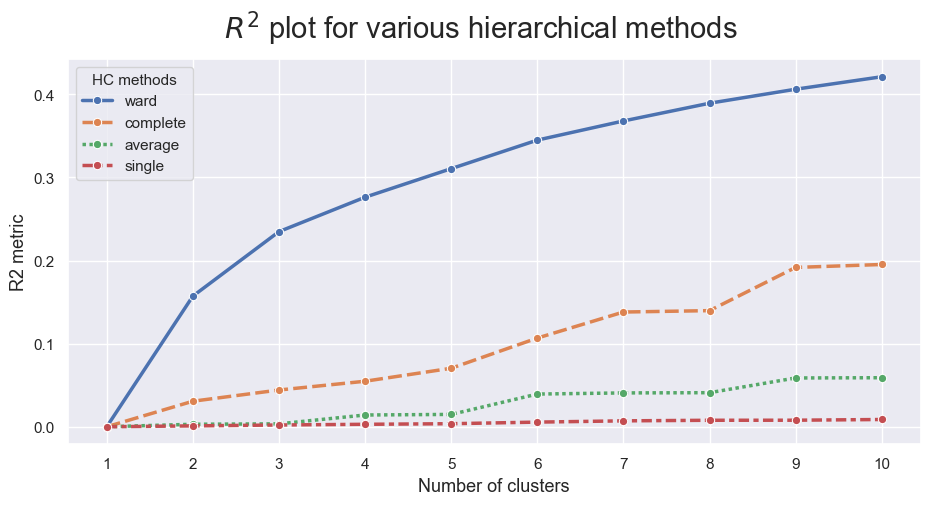

In [23]:
sns.set()

# Plot data
fig = plt.figure(figsize=(11,5))
sns.lineplot(data=r2_hc_methods, linewidth=2.5, markers=["o"]*4)

# Finalize the plot
plt.legend(title="HC methods", title_fontsize=11)
plt.xticks(range(1, max_nclus + 1))
plt.xlabel("Number of clusters", fontsize=13)
plt.ylabel("R2 metric", fontsize=13)

fig.suptitle("$R^2$ plot for various hierarchical methods", fontsize=21)

plt.show()

## Defining the number of clusters:

In [24]:
# setting distance_threshold=0 and n_clusters=None ensures we compute the full tree
linkage = 'ward'
distance = 'euclidean'


hclust = AgglomerativeClustering(linkage=linkage, metric=distance, distance_threshold=0, n_clusters=None)
hclust.fit_predict(df_clusters[metric_features])

array([28847, 20699, 18924, ...,     1,     2,     0], dtype=int64)

In [25]:
# Adapted from:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html#sphx-glr-auto-examples-cluster-plot-agglomerative-dendrogram-py

# create the counts of samples under each node (number of points being merged)
counts = np.zeros(hclust.children_.shape[0])
n_samples = len(hclust.labels_)

# hclust.children_ contains the observation ids that are being merged together
# At the i-th iteration, children[i][0] and children[i][1] are merged to form node n_samples + i
for i, merge in enumerate(hclust.children_):
    # track the number of observations in the current cluster being formed
    current_count = 0
    for child_idx in merge:
        if child_idx < n_samples:
            # If this is True, then we are merging an observation
            current_count += 1  # leaf node
        else:
            # Otherwise, we are merging a previously formed cluster
            current_count += counts[child_idx - n_samples]
    counts[i] = current_count

# the hclust.children_ is used to indicate the two points/clusters being merged (dendrogram's u-joins)
# the hclust.distances_ indicates the distance between the two points/clusters (height of the u-joins)
# the counts indicate the number of points being merged (dendrogram's x-axis)
linkage_matrix = np.column_stack(
    [hclust.children_, hclust.distances_, counts]
).astype(float)

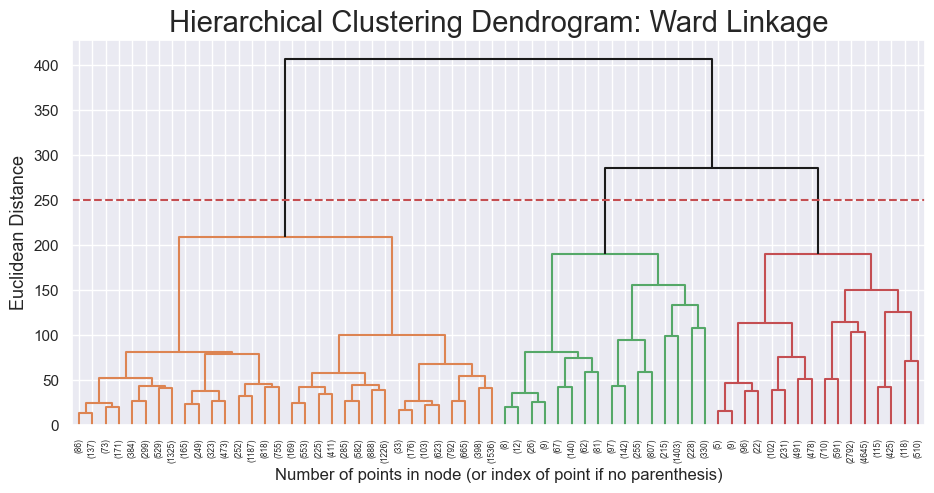

In [28]:
# Plot the corresponding dendrogram
sns.set()
fig = plt.figure(figsize=(11,5))
# The Dendrogram parameters need to be tuned
y_threshold = 250
dendrogram(linkage_matrix, truncate_mode='level', p=5, color_threshold=y_threshold, above_threshold_color='k')
plt.hlines(y_threshold, 0, 1000, colors="r", linestyles="dashed")
plt.title(f'Hierarchical Clustering Dendrogram: {linkage.title()} Linkage', fontsize=21)
plt.xlabel('Number of points in node (or index of point if no parenthesis)')
plt.ylabel(f'{distance.title()} Distance', fontsize=13)
plt.show()

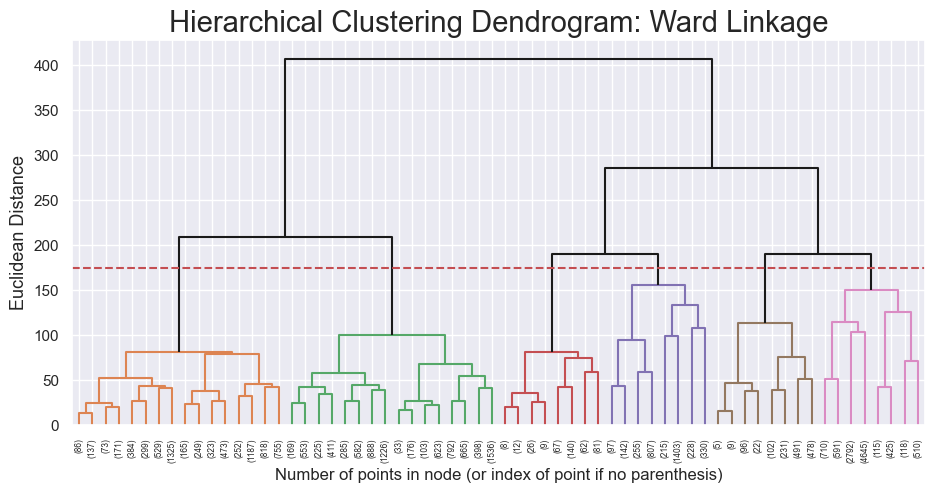

In [29]:
# Plot the corresponding dendrogram
sns.set()
fig = plt.figure(figsize=(11,5))
# The Dendrogram parameters need to be tuned
y_threshold = 175
dendrogram(linkage_matrix, truncate_mode='level', p=5, color_threshold=y_threshold, above_threshold_color='k')
plt.hlines(y_threshold, 0, 1000, colors="r", linestyles="dashed")
plt.title(f'Hierarchical Clustering Dendrogram: {linkage.title()} Linkage', fontsize=21)
plt.xlabel('Number of points in node (or index of point if no parenthesis)')
plt.ylabel(f'{distance.title()} Distance', fontsize=13)
plt.show()

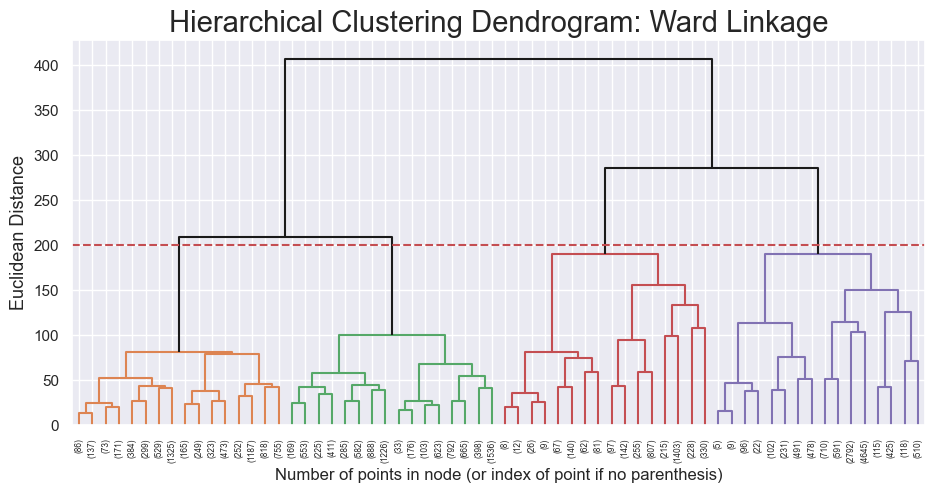

In [30]:
# Plot the corresponding dendrogram
sns.set()
fig = plt.figure(figsize=(11,5))
# The Dendrogram parameters need to be tuned
y_threshold = 200
dendrogram(linkage_matrix, truncate_mode='level', p=5, color_threshold=y_threshold, above_threshold_color='k')
plt.hlines(y_threshold, 0, 1000, colors="r", linestyles="dashed")
plt.title(f'Hierarchical Clustering Dendrogram: {linkage.title()} Linkage', fontsize=21)
plt.xlabel('Number of points in node (or index of point if no parenthesis)')
plt.ylabel(f'{distance.title()} Distance', fontsize=13)
plt.show()

### Test Cluster Solution

In [ ]:
#trocar depois
linkage = 'ward'
distance = 'euclidean'

In [31]:
n_clusters = 4

hcn_clust = AgglomerativeClustering(linkage=linkage, metric=distance, n_clusters=n_clusters)
hcn_labels = hcn_clust.fit_predict(df_clusters[metric_features])

In [32]:
# Characterizing the 4 clusters
df_clusters_concat = pd.concat([df_clusters[metric_features], 
                       pd.Series(hcn_labels, 
                                 name='labels', 
                                 index=df_clusters.index)], 
                    axis=1)

df_clusters_concat.groupby('labels').mean()

,customer_age,first_order,last_order,dif_order,tot_work_days,tot_leisure_days,tot_early_morning,tot_breakfast,tot_lunch,tot_afternoon,tot_dinner,tot_late_night,tot_western_cuisines,tot_oriental_cuisines,tot_other_cuisines,purchased_cuisines,tot_CUI
labels,,,,,,,,,,,,,,,,,
0,0.090589,-0.441867,0.385473,0.673315,0.122445,0.094931,0.227474,0.074425,0.072959,-0.015523,-0.063976,0.262907,0.017341,0.119792,0.119300,0.259693,0.130066
1,-0.088182,1.206246,0.343179,-0.722749,-0.448176,-0.433958,-0.180829,-0.231122,-0.303075,-0.255266,-0.280281,-0.211723,-0.292533,-0.248879,-0.235780,-0.530725,-0.410902
2,-0.068476,-0.740482,0.722561,1.189553,1.578565,1.519424,0.199660,0.908949,1.056771,1.175669,1.123304,0.098692,1.081711,0.849603,0.704417,1.427837,1.415166
3,0.000366,-0.355217,-1.404634,-0.829037,-0.502776,-0.444877,-0.247406,-0.327962,-0.318793,-0.301139,-0.166973,-0.211723,-0.257550,-0.345982,-0.282919,-0.538203,-0.471652


In [34]:
# SE NECESSARIO
n_clusters= 3

hcx_clust = AgglomerativeClustering(linkage=linkage, metric=distance, n_clusters=n_clusters)
hcx_labels = hcx_clust.fit_predict(df_clusters[metric_features])

In [35]:
# Characterizing the 3 clusters
df_clusters_concat = pd.concat([df_clusters[metric_features], 
                       pd.Series(hcx_labels, 
                                 name='labels', 
                                 index=df_clusters.index)], 
                    axis=1)

df_clusters_concat.groupby('labels').mean()

,customer_age,first_order,last_order,dif_order,tot_work_days,tot_leisure_days,tot_early_morning,tot_breakfast,tot_lunch,tot_afternoon,tot_dinner,tot_late_night,tot_western_cuisines,tot_oriental_cuisines,tot_other_cuisines,purchased_cuisines,tot_CUI
labels,,,,,,,,,,,,,,,,,
0,-0.047918,0.496213,-0.451591,-0.771081,-0.473004,-0.438923,-0.211103,-0.275157,-0.310222,-0.276126,-0.228757,-0.211723,-0.276625,-0.293034,-0.257215,-0.534125,-0.438526
1,0.090589,-0.441867,0.385473,0.673315,0.122445,0.094931,0.227474,0.074425,0.072959,-0.015523,-0.063976,0.262907,0.017341,0.119792,0.119300,0.259693,0.130066
2,-0.068476,-0.740482,0.722561,1.189553,1.578565,1.519424,0.199660,0.908949,1.056771,1.175669,1.123304,0.098692,1.081711,0.849603,0.704417,1.427837,1.415166


In [36]:
## See crosstab 
## What does this mean?

pd.crosstab(
    pd.Series(hcx_labels, name='hc5_labels', index=df_clusters.index),
    pd.Series(hcn_labels, name='hc4_labels', index=df_clusters.index),
    )

hc4_labels,0,1,2,3
hc5_labels,,,,
0,0,8665,0,7226
1,11340,0,0,0
2,0,0,3882,0


### Final Hierarchical clustering solution

In [ ]:
# final cluster solution
linkage = "ward"
distance = "euclidean"
n_clusters = #?

hclust = AgglomerativeClustering(linkage=linkage, metric=distance, n_clusters=n_clusters)

hc_labels = hclust.fit_predict(df[metric_features])

In [ ]:
# Characterizing the final clusters

df_concat = pd.concat([
    df[metric_features], 
    pd.Series(hc_labels, name='labels', index=df.index)
    ], 
    axis=1)
df_concat.groupby('labels').mean()

nao meti nada do visualize cluster  e comparar clusters means

<div class="alert alert-block alert-success">
<a class="anchor" id="section_4">
    
# 4. K-Means Clustering
    
</a>
<div>

In [11]:

from os.path import join
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

In [18]:
# Iterar pelas categorias e ajustar o modelo
for category, features in categories.items():
    kmclust = KMeans(n_clusters = 4, init='k-means++', n_init = 15, random_state=1)
    kmclust.fit(df[features])
    df[f'{category}_cluster'] = kmclust.predict(df[features])
    

In [ ]:
# Characterizing the final clusters by grouping by the cluster label and calculating the mean of each feature for each cluster
def characterize_clusters(group_features, cluster_labels, df):
    # Concatenate the cluster labels with the original features
    df_concat = pd.concat((df[group_features], pd.Series(cluster_labels, name='labels', index=df.index)), axis=1)
    
    # Group by the cluster label and calculate the mean of each feature for each cluster
    return df_concat.groupby('labels').mean()

### Inertia Method

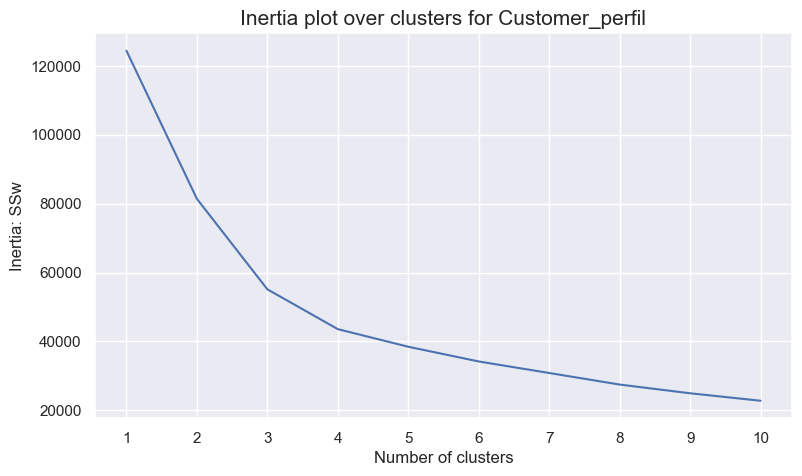

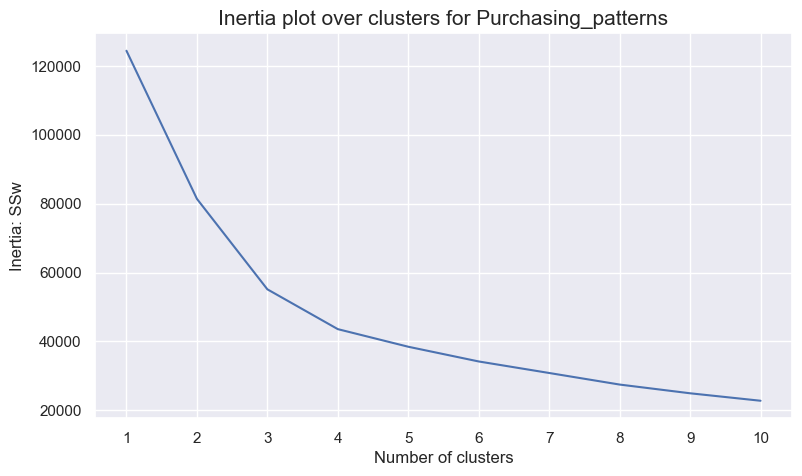

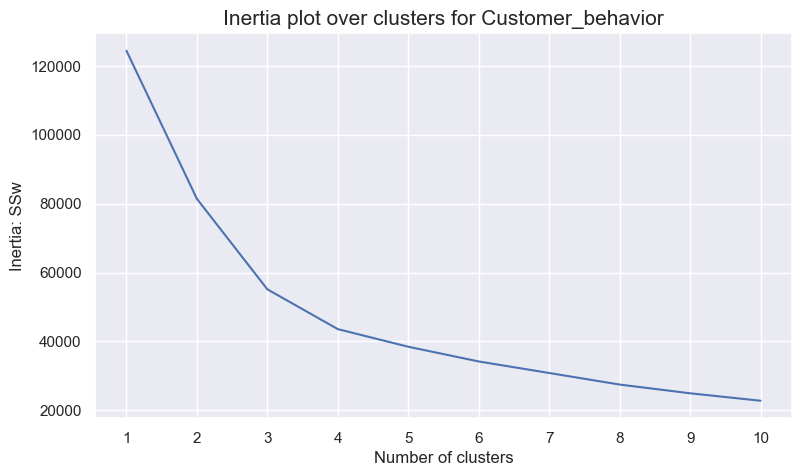

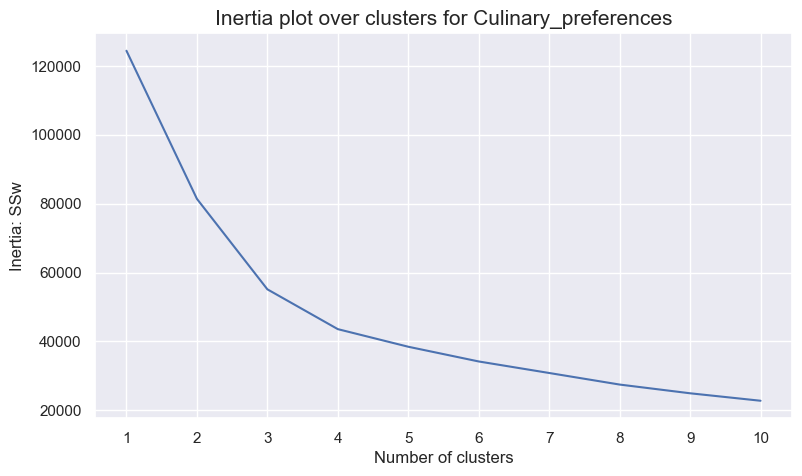

In [13]:
# Column groups
groups = {
    'Customer_perfil': Customer_perfil,
    'Purchasing_patterns': Purchasing_patterns,
    'Customer_behavior': Customer_behavior,
    'Culinary_preferences': Culinary_preferences
}

for group_name, columns in groups.items():
    inertia = []
    range_clusters = range(1,11)
    for n_clus in range_clusters:  # iterate over desired ncluster range
        kmclust = KMeans(n_clusters=n_clus, init='random', n_init=15, random_state=1)
        kmclust.fit(df[Customer_perfil])
        inertia.append(kmclust.inertia_)  # save the inertia of the given cluster solution
    
    # Do the plot

    fig, ax = plt.subplots(figsize=(9,5))

    ax.plot(range_clusters, inertia)
    ax.set_xticks(range_clusters)
    ax.set_ylabel("Inertia: SSw")
    ax.set_xlabel("Number of clusters")
    ax.set_title(f"Inertia plot over clusters for {group_name}", size=15)

    plt.show()

After analyzing all the plots, we firmly conclude that the optimal number of clusters across all groups lies between **three and four**, with a strong preference for **four**. To confirm this, we tested various parameters for Customer_perfil to see if there was any improvement.

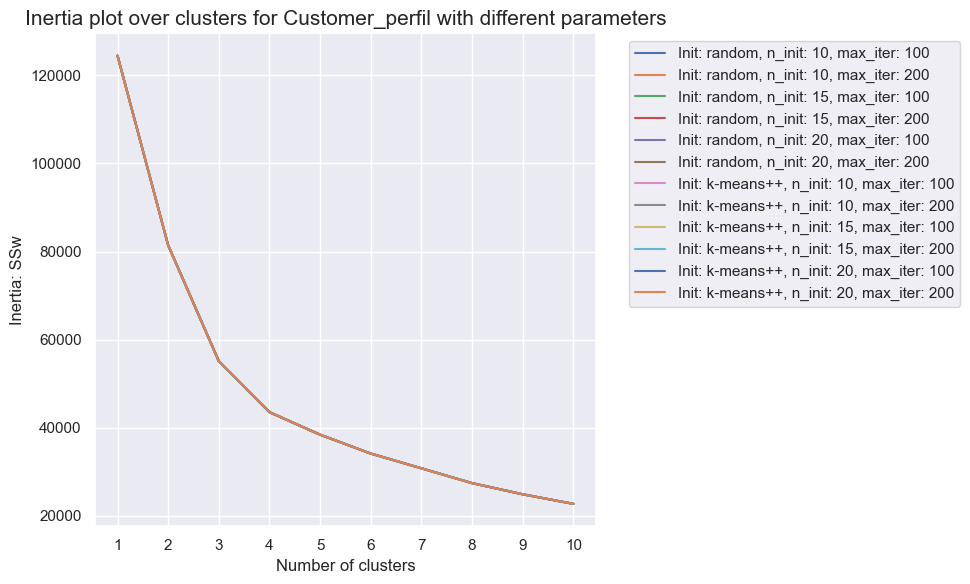

In [14]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Variables to store results
results = []
range_clusters = range(1, 11)  # Range of clusters to test

# Lists of parameters to test
inits = ['random', 'k-means++']
n_inits = [10, 15, 20]
max_iters = [100, 200]

# Loop to iterate over different parameters
for init_method in inits:
    for n_init_val in n_inits:
        for max_iter_val in max_iters:
            inertia = []  # List to store inertia values for different clusters
            for n_clus in range_clusters:
                # Create and fit the KMeans model
                kmclust = KMeans(
                    n_clusters=n_clus,
                    init=init_method,
                    n_init=n_init_val,
                    max_iter=max_iter_val,
                    random_state=1
                )
                kmclust.fit(df[Customer_perfil])
                inertia.append(kmclust.inertia_)  # Save the inertia
                
            # Save the results in a list
            results.append({
                'init': init_method,
                'n_init': n_init_val,
                'max_iter': max_iter_val,
                'inertia': inertia
            })

# Plot the results
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the inertia curves for each combination of parameters
for result in results:
    label = f"Init: {result['init']}, n_init: {result['n_init']}, max_iter: {result['max_iter']}"
    ax.plot(range_clusters, result['inertia'], label=label)

ax.set_xticks(range_clusters)
ax.set_ylabel("Inertia: SSw")
ax.set_xlabel("Number of clusters")
ax.set_title("Inertia plot over clusters for Customer_perfil with different parameters", size=15)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Place legend outside the plot

plt.tight_layout()
plt.show()


After analyzing the graphic, we conclude that other parameters did not influence our choice for the number of clusters, which remains at **four**.

<a class="anchor" id="section_4_1">
    
## 4.1  Customer Perfil Perspective
    
</a>

In [21]:
customer_perfil_characterization = characterize_clusters(Customer_perfil, df['Customer_perfil_cluster'], df)

# Display the results

print("Customer Perfil Clusters Characterization:")
print(customer_perfil_characterization)

Customer Perfil Clusters Characterization:
        customer_age  first_order  last_order  dif_order
labels                                                  
0          -0.203829     1.348355    0.394151  -0.799471
1          -0.273322    -0.635244    0.591154   0.997542
2          -0.202674    -0.422773   -1.467807  -0.823688
3           2.090808    -0.087649    0.123330   0.171018


<a class="anchor" id="section_4_2">
    
## 4.2  Purchasing Patterns Perspective
    
</a>

In [22]:
purchasing_patterns_characterization = characterize_clusters(Purchasing_patterns, df['Purchasing_patterns_cluster'], df)

# Display the results

print("\nPurchasing Patterns Clusters Characterization:")
print(purchasing_patterns_characterization)


Purchasing Patterns Clusters Characterization:
        tot_work_days  tot_leisure_days
labels                                 
0            1.545052          0.325795
1           -0.343497         -0.433436
2            3.151292          3.361459
3           -0.189675          1.172012


<a class="anchor" id="section_4_3">
    
## 4.3  Customer Behavior Perspective
    
</a>

In [23]:
customer_behavior_characterization = characterize_clusters(Customer_behavior, df['Customer_behavior_cluster'], df)

# Display the results

print("\nCustomer Behavior Clusters Characterization:")
print(customer_behavior_characterization)


Customer Behavior Clusters Characterization:
        tot_early_morning  tot_breakfast  tot_lunch  tot_afternoon  \
labels                                                               
0               -0.255526      -0.139823  -0.179593      -0.142797   
1               -0.305695       0.652762   1.543287       1.616258   
2                2.447049       0.488360  -0.193583      -0.482892   
3                0.001010      -0.086791  -0.032142      -0.195682   

        tot_dinner  tot_late_night  
labels                              
0        -0.150275       -0.211723  
1         1.356992       -0.116778  
2        -0.445006       -0.129331  
3         0.336232        3.456595  


<a class="anchor" id="section_4_4">
    
## 4.4  Culinary Preferences Perspective
    
</a>

In [24]:
culinary_preferences_characterization = characterize_clusters(Culinary_preferences, df['Culinary_preferences_cluster'], df)

# Display the results

print("\nCulinary Preferences Clusters Characterization:")
print(culinary_preferences_characterization)


Culinary Preferences Clusters Characterization:
        tot_western_cuisines  tot_oriental_cuisines  tot_other_cuisines  \
labels                                                                    
0                  -0.085015               0.081067            0.922732   
1                   0.436473               3.433806            0.534647   
2                  -0.227257              -0.246320           -0.298585   
3                   3.234847               0.165749            0.119329   

        purchased_cuisines   tot_CUI  
labels                                
0                 1.245844  0.322093  
1                 0.894149  2.704883  
2                -0.450123 -0.393886  
3                 0.685881  1.977083  


<div class="alert alert-block alert-success">
<a class="anchor" id="section_5">
    
# 5. Self-Organization Maps
    
</a>
<div>

<div class="alert alert-block alert-success">
<a class="anchor" id="section_6">
    
# 6. DBSCAN
    
</a>
<div>

### ADICIONAR PARTE RITA

In [ ]:
!pip uninstall scikit-learn
!pip install scikit-learn




^C


In [18]:
# Performing GMM clustering
gmm = GaussianMixture(n_components=4, covariance_type='full', n_init=10, init_params='kmeans', random_state=1)
gmm_labels = gmm.fit_predict(df[Customer_perfil])
labels_proba = gmm.predict_proba(df[Customer_perfil])

NameError: name 'GaussianMixture' is not defined